<a href="https://colab.research.google.com/github/RMLAI/Projects/blob/master/Copy_of_Computer_Vision_Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/My Drive/Data

/content/drive/My Drive/Data


In [2]:
ls

Advertising.csv                      heart-disease.csv
Auto.csv                             Hitters.csv
bluebook-for-bulldozers/             Hitters_X_test.csv
Boston.csv                           Hitters_X_train.csv
Caravan.csv                          Hitters_y_test.csv
car-photo.png                        Hitters_y_train.csv
car-sales.csv                        Khan_xtest.csv
car-sales-extended.csv               Khan_xtrain.csv
car-sales-extended-missing-data.csv  Khan_ytest.csv
car-sales-missing-data.csv           Khan_ytrain.csv
Carseats.csv                         NCI60_X.csv
computer_vision/                     NCI60_y.csv
covid_19_india.csv                   panda.png
Credit.csv                           random_forest_model_1.pkl
Default.xlsx                         Smarket.csv
dog-photo.png                        USArrests.csv
gs_rf_model_1.pkl                    Wage.csv
Heart.csv


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


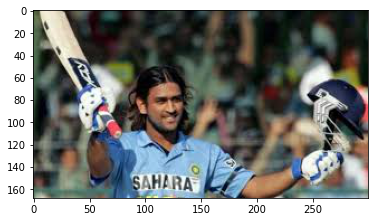

In [4]:
#check images
img = image.load_img('computer_vision/training/dhoni/3.jpg')
plt.imshow(img)

In [5]:
cv2.imread('computer_vision/training/dhoni/3.jpg')

array([[[ 45,  79,  62],
        [ 50,  84,  67],
        [ 54,  84,  71],
        ...,
        [  7,  18,  10],
        [ 11,  17,  12],
        [ 11,  17,  12]],

       [[ 56,  90,  73],
        [ 60,  94,  77],
        [ 61,  94,  80],
        ...,
        [  8,  19,  11],
        [ 11,  17,  12],
        [ 12,  18,  13]],

       [[ 63,  99,  82],
        [ 65, 101,  84],
        [ 65, 100,  86],
        ...,
        [  9,  20,  12],
        [ 12,  19,  12],
        [ 13,  20,  13]],

       ...,

       [[ 90, 112,  88],
        [108, 130, 106],
        [131, 152, 130],
        ...,
        [164, 167, 151],
        [158, 163, 148],
        [153, 160, 147]],

       [[ 89, 112,  90],
        [111, 133, 114],
        [139, 161, 143],
        ...,
        [181, 179, 168],
        [175, 176, 166],
        [170, 174, 163]],

       [[ 94, 116,  97],
        [118, 140, 121],
        [149, 170, 155],
        ...,
        [193, 191, 180],
        [188, 186, 178],
        [183, 184, 175]]

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [23]:
train_dataset = train.flow_from_directory('computer_vision/training/',
                                          target_size = (200,200),
                                          batch_size=3,
                                          class_mode='binary')

validation_dataset = train.flow_from_directory('computer_vision/validation/',
                                          target_size = (200,200),
                                          batch_size=3,
                                          class_mode='binary')

FileNotFoundError: ignored

In [8]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'dhoni': 1, 'kohli': 2}

In [9]:
train_dataset.classes

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [20]:
%cd computer_vision/training
!ls

[Errno 2] No such file or directory: 'computer_vision/training'
/content/drive/My Drive/Data/computer_vision
test  training	validation


In [21]:
%cd training/
!ls

/content/drive/My Drive/Data/computer_vision/training
dhoni  kohli


In [22]:
%rm -rf .ipynb_checkpoints/

In [24]:
!ls

dhoni  kohli


In [ ]:
#modeling
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 1s 402ms/step - loss: -624739.5625 - accuracy: 0.5556 - val_loss: -602827.4375 - val_accuracy: 0.5714
Epoch 2/10
3/3 [==============================] - 1s 340ms/step - loss: -735680.3125 - accuracy: 0.4444 - val_loss: -626999.6875 - val_accuracy: 0.5714
Epoch 3/10
3/3 [==============================] - 1s 270ms/step - loss: -938053.5625 - accuracy: 0.4286 - val_loss: -651537.4375 - val_accuracy: 0.5714
Epoch 4/10
3/3 [==============================] - 1s 345ms/step - loss: -567925.3125 - accuracy: 0.6667 - val_loss: -665183.4375 - val_accuracy: 0.5714
Epoch 5/10
3/3 [==============================] - 1s 336ms/step - loss: -458217.1250 - accuracy: 0.7778 - val_loss: -676573.4375 - val_accuracy: 0.5714
Epoch 6/10
3/3 [==============================] - 1s 338ms/step - loss: -851842.5000 - accuracy: 0.5556 - val_loss: -695235.4375 - val_accuracy: 0.5714
Epoch 7/10
3/3 [==============================] - 1s 383ms/step - loss: -783265.7500 - a

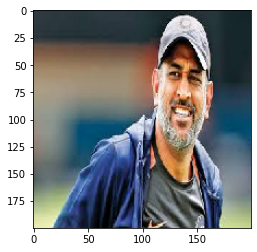

dhoni


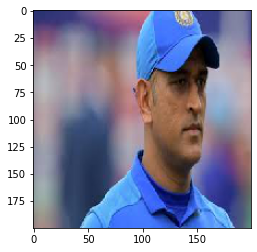

dhoni


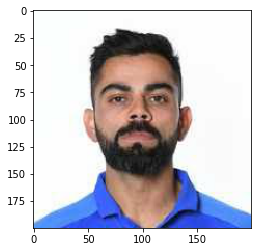

dhoni


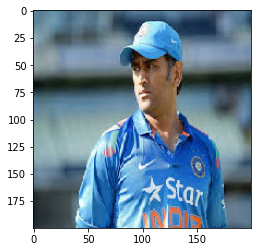

dhoni


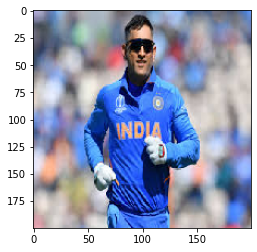

dhoni


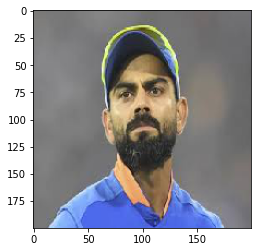

dhoni


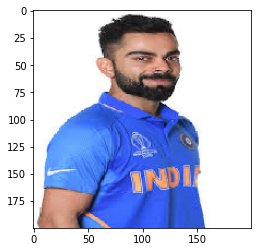

dhoni


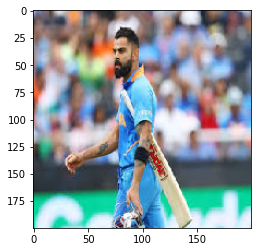

dhoni


In [ ]:
dir_path = 'computer_vision/test'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 2:
    print('kohli')
  else:
    print('dhoni')

In [ ]:
val

array([[1.]], dtype=float32)